# 📉 Diferenciación y Estacionariedad de la Serie de Tiempo

El objetivo principal de este cuaderno es aplicar las transformaciones necesarias para que ambas series de tiempo (Máxima y Mínima) cumplan con el requisito de estacionariedad, un paso fundamental para el modelado ARIMA.

Recordatorio de los resultados del Test ADF anterior:

| Variable | P-Valor | Estacionaria (p < 0.05)? | Acción Requerida |

| :--- | :--- | :--- | :--- |

| Temp_Maxima_C | 0.0654 | ❌ NO | Aplicar diferenciación (d=1) |

| Temp_Minima_C | 0.0227 | ✅ SÍ | No requiere diferenciación (d=0) |

Procederemos a aplicar la diferenciación de primer orden (d=1) solo a la serie de Temp_Maxima_C y luego re-validaremos su estacionariedad.

In [2]:
# Importar el dataset, aplicar la transformación d=1 de diferenciación a la Temp Máxima,
# verificar la estacionariedad con el Test ADF y analizar la autocorrelación (ACF/PACF) en ambas series.

# --- 1. Configuración e Importación ---
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np # Importar numpy para la diferenciación

# Configuración de matplotlib para gráficos más limpios
plt.rcParams['figure.figsize'] = (15, 6)
plt.style.use('seaborn-v0_8-whitegrid')

# Cargar el dataset limpio

df = pd.read_csv('dataset/pinar_del_rio_temperaturas_LIMPIO_FINAL.csv', index_col='Fecha', parse_dates=True)

# Separar las series de tiempo para trabajar con ellas
ts_maxima = df['Temp_Maxima_C']
ts_minima = df['Temp_Minima_C']


--- Resultados de la Diferenciación ---
Longitud original de Temp_Maxima: 671
Longitud de Temp_Maxima después de diferenciación (d=1): 670

Primeros 5 valores de Temp_Maxima Diferenciada:
Fecha
2024-01-02    0.1
2024-01-03   -1.0
2024-01-04    4.0
2024-01-05   -1.4
2024-01-06    2.4
Name: Temp_Maxima_C, dtype: float64


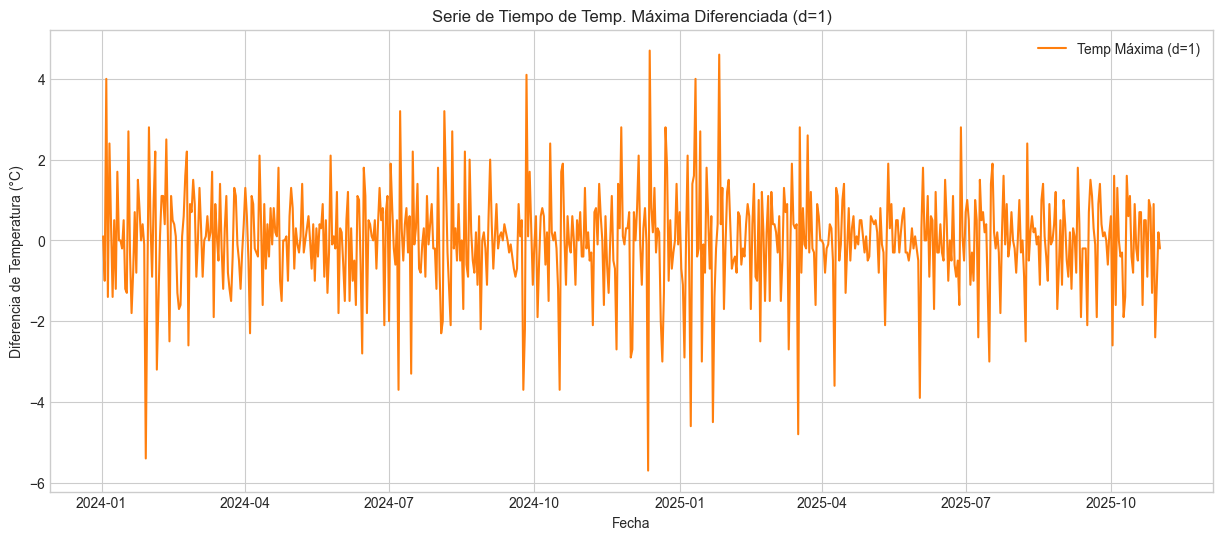

In [3]:
# --- 2. Aplicar Diferenciación d=1 a Temp Máxima ---

# Aplicar la diferenciación de orden 1 (d=1) a la Temp_Maxima_C
# Esto calcula la diferencia entre un valor actual y el anterior: X_t - X_{t-1}
ts_maxima_diff = ts_maxima.diff().dropna()

print("\n--- Resultados de la Diferenciación ---")
print(f"Longitud original de Temp_Maxima: {len(ts_maxima)}")
print(f"Longitud de Temp_Maxima después de diferenciación (d=1): {len(ts_maxima_diff)}")
print("\nPrimeros 5 valores de Temp_Maxima Diferenciada:")
print(ts_maxima_diff.head())

# Graficar la serie diferenciada para visualizar la eliminación de la tendencia
plt.figure(figsize=(15, 6))
plt.plot(ts_maxima_diff, label='Temp Máxima (d=1)', color='tab:orange')
plt.title('Serie de Tiempo de Temp. Máxima Diferenciada (d=1)')
plt.xlabel('Fecha')
plt.ylabel('Diferencia de Temperatura (°C)')
plt.legend()
plt.show()

In [4]:
# --- 3. Test de Dickey-Fuller Aumentado (ADF) para Verificar Estacionariedad ---

def test_adfuller(serie, nombre_serie):
    """Realiza e interpreta el Test ADF."""
    print(f"\n🔬 **Test ADF para: {nombre_serie}**")
    resultado = adfuller(serie, autolag='AIC')
    p_valor = resultado[1]

    # Presentación de resultados en formato DataFrame/Tabla
    df_resultados = pd.DataFrame({
        'Estadístico ADF': [resultado[0]],
        'p-valor': [p_valor],
        'Retardos Usados': [resultado[2]]
    })
    df_resultados.index = [nombre_serie]
    print(df_resultados.to_string())

    print("\nValores Críticos de Estacionariedad:")
    for key, value in resultado[4].items():
        print(f'   {key}: {value}')

    # Interpretación profesional del resultado
    print("\n--- Conclusión del Test ADF ---")
    if p_valor <= 0.05:
        print(f"✅ Rechazamos H0 (p-valor={p_valor:.4f}). La serie **ES ESTACIONARIA**.")
    else:
        print(f"⚠️ Aceptamos H0 (p-valor={p_valor:.4f}). La serie **NO ES ESTACIONARIA** (requiere más diferenciación).")

# Aplicar el test a la serie Mínima original (d=0) y a la Máxima diferenciada (d=1)
# Asumimos que la Mínima también requerirá diferenciación, pero se testea su estado actual (d=0) por el momento
test_adfuller(ts_maxima_diff, 'Temp Máxima Diferenciada (d=1)')
test_adfuller(ts_minima, 'Temp Mínima Original (d=0)')


🔬 **Test ADF para: Temp Máxima Diferenciada (d=1)**
                                Estadístico ADF       p-valor  Retardos Usados
Temp Máxima Diferenciada (d=1)       -10.829048  1.726866e-19               11

Valores Críticos de Estacionariedad:
   1%: -3.4403271946832645
   5%: -2.8659424728408456
   10%: -2.5691144817582985

--- Conclusión del Test ADF ---
✅ Rechazamos H0 (p-valor=0.0000). La serie **ES ESTACIONARIA**.

🔬 **Test ADF para: Temp Mínima Original (d=0)**
                            Estadístico ADF   p-valor  Retardos Usados
Temp Mínima Original (d=0)        -3.778454  0.003136                4

Valores Críticos de Estacionariedad:
   1%: -3.440206881811471
   5%: -2.8658894709126246
   10%: -2.569086242819396

--- Conclusión del Test ADF ---
✅ Rechazamos H0 (p-valor=0.0031). La serie **ES ESTACIONARIA**.




--- 📉 Análisis de Autocorrelación (ACF) y Parcial (PACF) ---


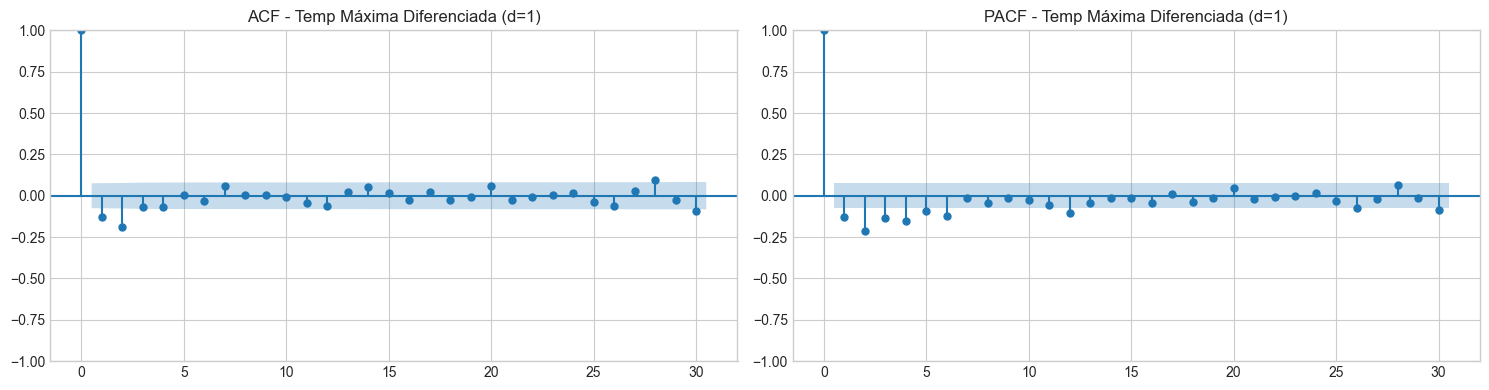

Interpretación de ACF/PACF para Temp Máxima (d=1):
* ACF muestra la correlación entre la serie y sus propios valores rezagados.
* PACF muestra la correlación solo entre el valor actual y un rezago específico, sin la influencia de los rezagos intermedios.
* Estos gráficos son cruciales para determinar los órdenes (p y q) del modelo ARIMA(p, d, q).


In [5]:
# --- 4. Análisis de Autocorrelación (ACF) y Autocorrelación Parcial (PACF) ---

print("\n\n--- 📉 Análisis de Autocorrelación (ACF) y Parcial (PACF) ---")

# Gráficos para Temp Máxima Diferenciada (d=1)
plt.figure(figsize=(15, 4))
ax1 = plt.subplot(121)
plot_acf(ts_maxima_diff, lags=30, ax=ax1, title='ACF - Temp Máxima Diferenciada (d=1)')
ax2 = plt.subplot(122)
plot_pacf(ts_maxima_diff, lags=30, ax=ax2, title='PACF - Temp Máxima Diferenciada (d=1)')
plt.tight_layout()
plt.show()

print("Interpretación de ACF/PACF para Temp Máxima (d=1):")
print("* ACF muestra la correlación entre la serie y sus propios valores rezagados.")
print("* PACF muestra la correlación solo entre el valor actual y un rezago específico, sin la influencia de los rezagos intermedios.")
print("* Estos gráficos son cruciales para determinar los órdenes (p y q) del modelo ARIMA(p, d, q).")

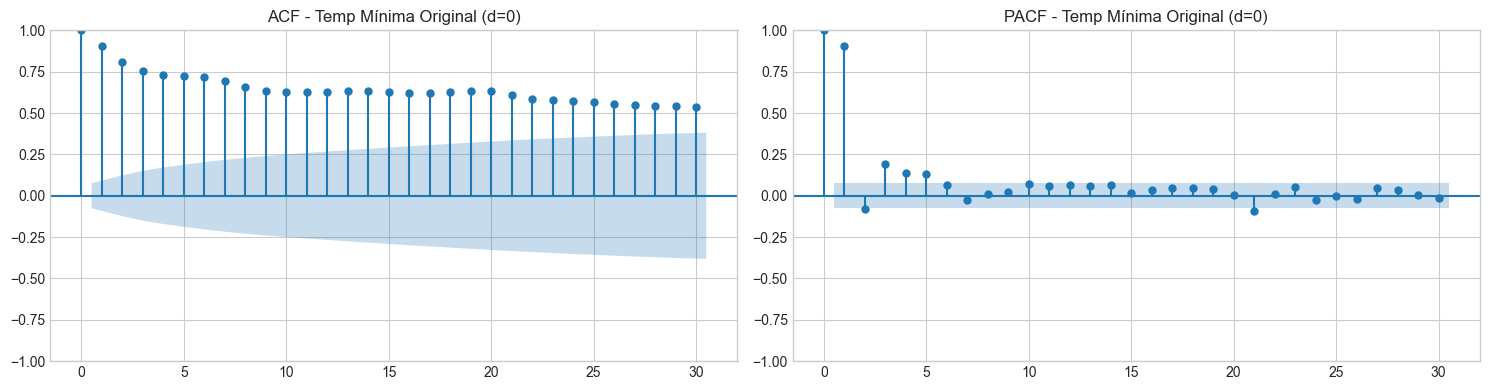


Interpretación de ACF/PACF para Temp Mínima (d=0):
* El decaimiento lento en la ACF y el pico fuerte en el Lag 1 de la PACF son indicativos de **NO-ESTACIONARIEDAD** (tal como el Test ADF también sugiere).
* Esto confirma la necesidad de aplicar diferenciación (d=1) también a la serie de Temp Mínima antes de buscar los órdenes ARIMA.


In [6]:
# Gráficos para Temp Mínima Original (d=0) - Para ver la necesidad de d=1
plt.figure(figsize=(15, 4))
ax3 = plt.subplot(121)
plot_acf(ts_minima, lags=30, ax=ax3, title='ACF - Temp Mínima Original (d=0)')
ax4 = plt.subplot(122)
plot_pacf(ts_minima, lags=30, ax=ax4, title='PACF - Temp Mínima Original (d=0)')
plt.tight_layout()
plt.show()

print("\nInterpretación de ACF/PACF para Temp Mínima (d=0):")
print("* El decaimiento lento en la ACF y el pico fuerte en el Lag 1 de la PACF son indicativos de **NO-ESTACIONARIEDAD** (tal como el Test ADF también sugiere).")
print("* Esto confirma la necesidad de aplicar diferenciación (d=1) también a la serie de Temp Mínima antes de buscar los órdenes ARIMA.")